In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 10

In [2]:
# Our dataset
data_url = "http://www.google.org/flutrends/about/data/flu/us/data.txt"

In [3]:
# Grab the data with urllib
import urllib2
response = urllib2.urlopen(data_url)
text = response.read()
print text

Google Flu Trends - United States
Copyright 2015 Google Inc.

Exported data may be used for any purpose, subject to the Google Terms of Service (http://www.google.com/accounts/TOS?hl=en_US).
If you choose to use the data, please attribute it to Google as follows: "Data Source: Google Flu Trends (http://www.google.org/flutrends)".

Each week begins on the Sunday (Pacific Time) indicated for the row.
Data for the current week will be updated each day until Saturday (Pacific Time).
Note: To open these files in a spreadsheet application, we recommend you save each text file as a CSV spreadsheet.
For more information, please visit http://www.google.org/flutrends

Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North

In [4]:
# Grab data directly with pandas
import pandas as pd
df = pd.read_csv(data_url, skiprows=11, parse_dates=True, index_col=0, engine='python')
# If no internet connection, use the local version
#df = pd.read_csv("flu_trends_backup.csv", skiprows=11, parse_dates=True, index_col=0, engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 620 entries, 2003-09-28 to 2015-08-09
Columns: 159 entries, United States to Milwaukee, WI
dtypes: float64(59), int64(100)
memory usage: 775.0 KB


In [5]:
df.last('2M')

,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,"Salt Lake City, UT","Arlington, VA","Norfolk, VA","Reston, VA","Richmond, VA","Bellevue, WA","Seattle, WA","Spokane, WA","Madison, WI","Milwaukee, WI"
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-05,1024,589,755,1582,1449,1640,447,400,1092,1205,...,539,1506,1247,1870,1090,938,667,859,797,513
2015-07-12,770,549,685,1065,1256,1401,535,445,1021,1213,...,512,1462,1209,1799,1105,888,586,866,750,500
2015-07-19,767,486,678,953,1267,1410,421,502,1039,1215,...,432,1514,1186,1774,1072,848,594,860,694,550
2015-07-26,666,470,688,1041,1129,1349,347,437,996,1041,...,419,1608,1141,1706,1056,822,711,854,663,531
2015-08-02,735,565,664,963,1104,1428,312,455,975,1373,...,465,1666,1137,1699,1136,784,558,808,606,556
2015-08-09,671,682,718,1031,1106,1625,409,362,999,1587,...,410,1669,1080,1710,1058,782,494,761,587,520


In [6]:
# Grab one of the columns
df.Texas

Date
2003-09-28    1398
2003-10-05    1517
2003-10-12    2010
2003-10-19    2786
2003-10-26    2917
2003-11-02    3177
2003-11-09    3344
2003-11-16    4287
2003-11-23    4828
2003-11-30    3747
2003-12-07    4549
2003-12-14    4551
2003-12-21    4809
2003-12-28    4341
2004-01-04    3426
2004-01-11    2312
2004-01-18    2118
2004-01-25    2003
2004-02-01    1881
2004-02-08    1734
2004-02-15    1764
2004-02-22    1634
2004-02-29    1649
2004-03-07    1316
2004-03-14    1191
2004-03-21    1145
2004-03-28    1094
2004-04-04    1118
2004-04-11    1107
2004-04-18    1145
              ... 
2015-01-18    6759
2015-01-25    6193
2015-02-01    5037
2015-02-08    4528
2015-02-15    4100
2015-02-22    3533
2015-03-01    3484
2015-03-08    3740
2015-03-15    2993
2015-03-22    2832
2015-03-29    2611
2015-04-05    2266
2015-04-12    2207
2015-04-19    1969
2015-04-26    1775
2015-05-03    2046
2015-05-10    1802
2015-05-17    1795
2015-05-24    1955
2015-05-31    1750
2015-06-07    1818
2015-06

In [7]:
# Print out basic summary statistics
df.Texas.describe()

count      620.000000
mean      2893.730645
std       2291.959152
min        804.000000
25%       1450.500000
50%       2289.500000
75%       3341.750000
max      18590.000000
Name: Texas, dtype: float64

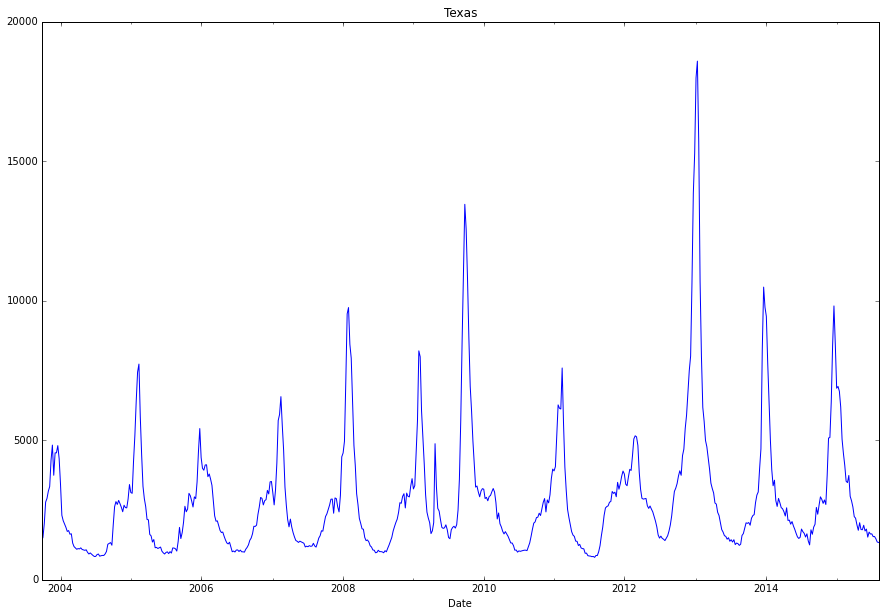

In [8]:
# Easy plotting of one state
df.Texas.plot(title="Texas")

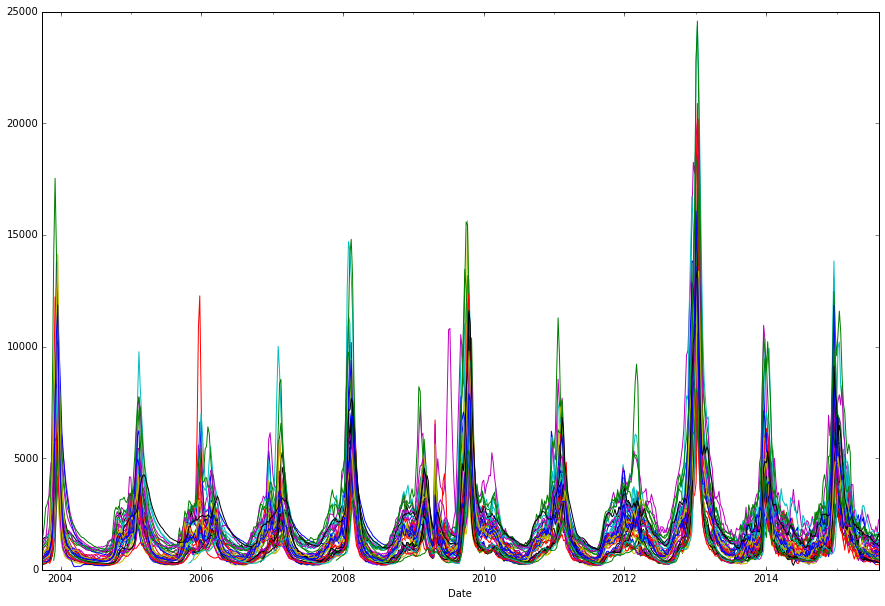

In [9]:
# Or all states
states = df.columns[range(1,52)]
df[states].plot(legend=False)

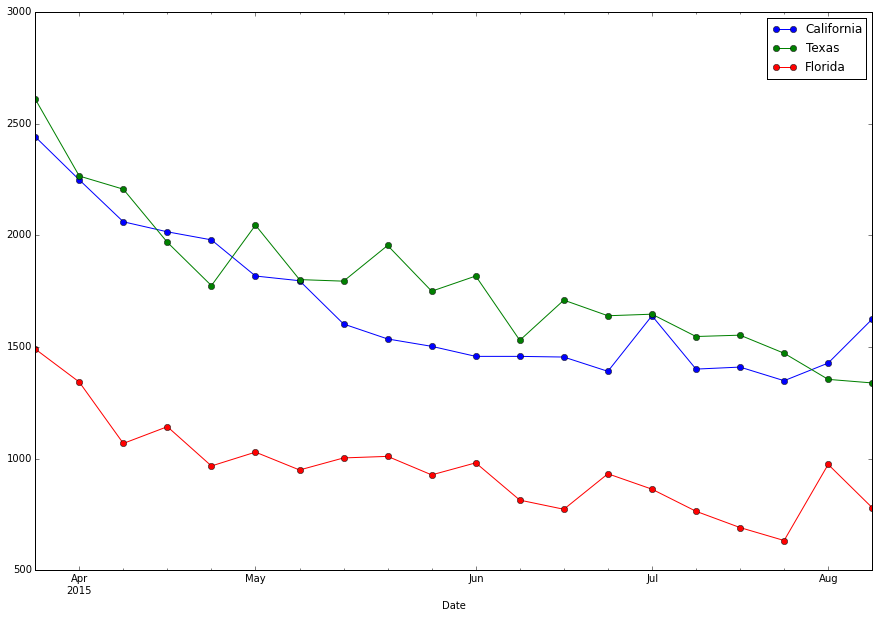

In [10]:
# Or a select few, over a the last 20 weeks
states = ['California', 'Texas', 'Florida']
df[states].last('20W').plot(style='o-')

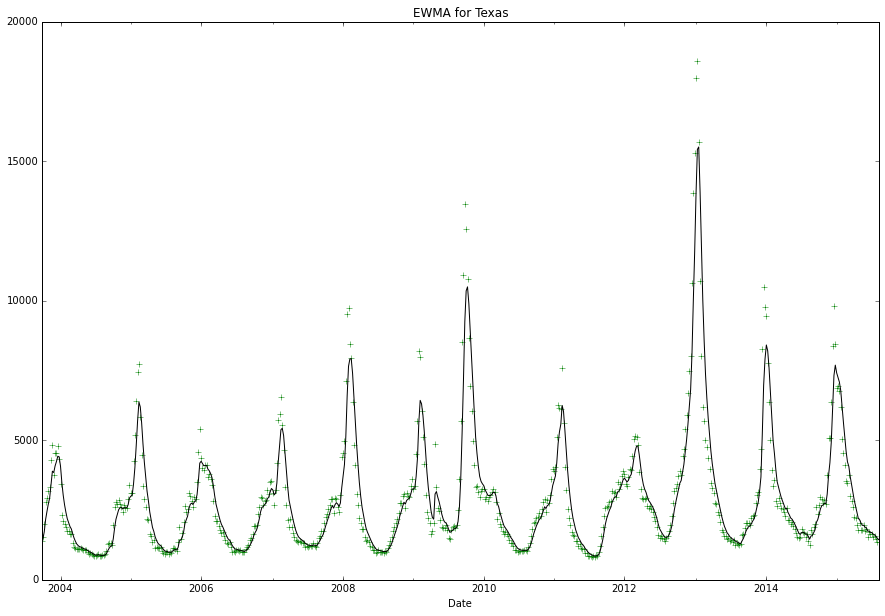

In [11]:
# Smooth the data with a 5-week, exponentially-weighted moving average
df.Texas.plot(style='g+')
pd.ewma(df.Texas, span=5).plot(style="k")
plt.title("EWMA for Texas");

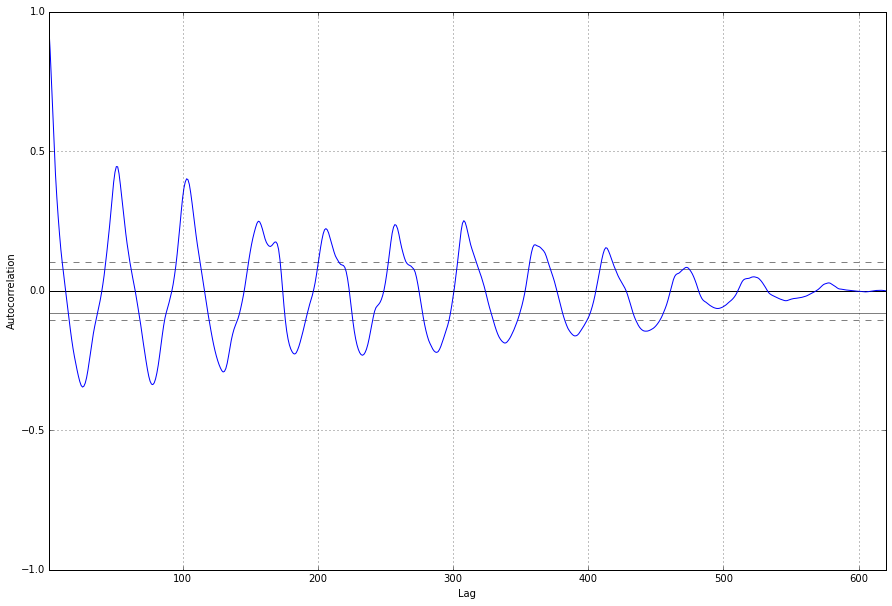

In [12]:
# How random is the data? (autocorrelation showing 95% and 99% confidence bands)
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df.Texas)

In [13]:
# Doing an out-of-sample prediction with statsmodels with an autoregressive model
import statsmodels.api as sm
data = df.Texas
ar_model = sm.tsa.AR(data, freq='W')
ar_res = ar_model.fit(maxlag=104, disp=True)

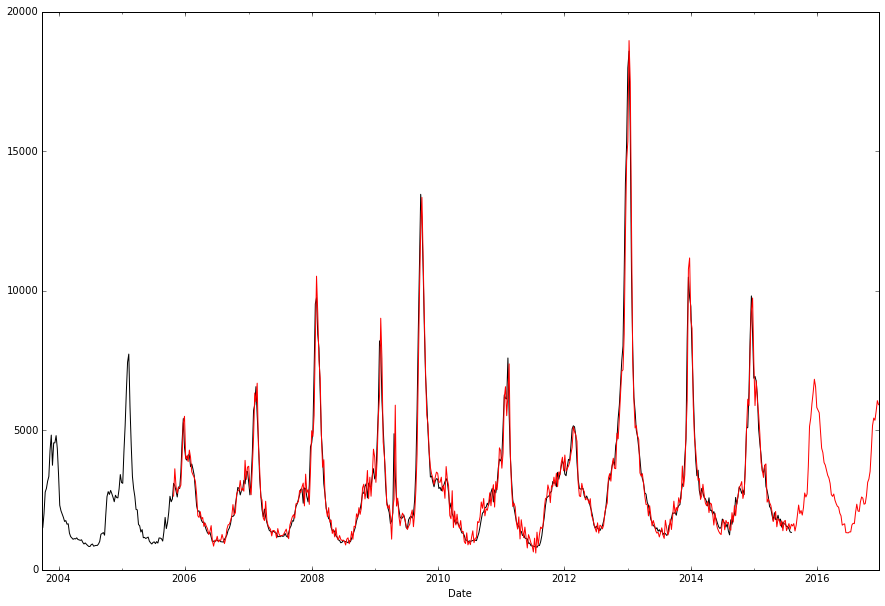

In [15]:
pred = ar_res.predict(start='2005-10-30', end='2016')
df.Texas.plot(style='k')
pred.plot(style='r')